In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel("/data.xlsx")

In [4]:
df.describe?

Signature: df.describe(percentiles=None, include=None, exclude=None) -> 'Self'
Docstring:
Generate descriptive statistics.

Descriptive statistics include those that summarize the central
tendency, dispersion and shape of a
dataset's distribution, excluding ``NaN`` values.

Analyzes both numeric and object series, as well
as ``DataFrame`` column sets of mixed data types. The output
will vary depending on what is provided. Refer to the notes
below for more detail.

Parameters
----------
percentiles : list-like of numbers, optional
    The percentiles to include in the output. All should
    fall between 0 and 1. The default is
    ``[.25, .5, .75]``, which returns the 25th, 50th, and
    75th percentiles.
include : 'all', list-like of dtypes or None (default), optional
    A white list of data types to include in the result. Ignored
    for ``Series``. Here are the options:

    - 'all' : All columns of the input will be included in the output.
    - A list-like of dtypes : Limits the r

In [5]:
df.columns

Index(['fecha_nacimiento', 'sexo', 'fecha_examen', 'examen', 'edad', 'fuma',
       'label'],
      dtype='object')

In [6]:
feature_cols = ['edad']
X = df[feature_cols] # Features
y = df.label # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

Text(0.5, 427.9555555555555, 'Predicted label')

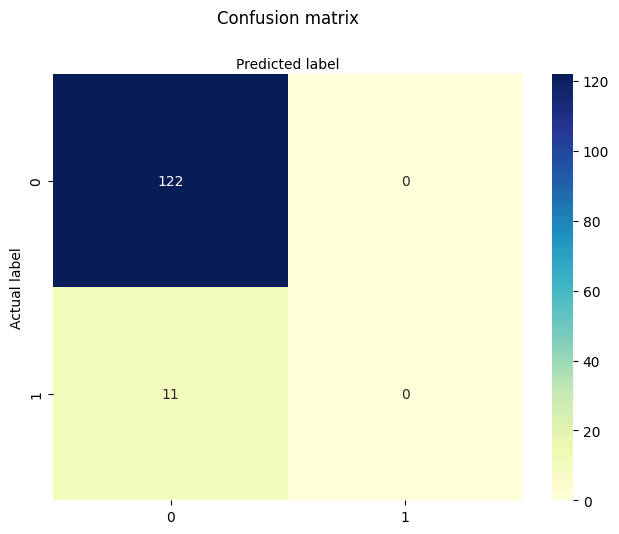

In [7]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [8]:
target_names = ['no fuma', 'fuma']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     no fuma       0.92      1.00      0.96       122
        fuma       0.00      0.00      0.00        11

    accuracy                           0.92       133
   macro avg       0.46      0.50      0.48       133
weighted avg       0.84      0.92      0.88       133



/opt/homebrew/Cellar/jupyterlab/4.1.4/libexec/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/Cellar/jupyterlab/4.1.4/libexec/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/Cellar/jupyterlab/4.1.4/libexec/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

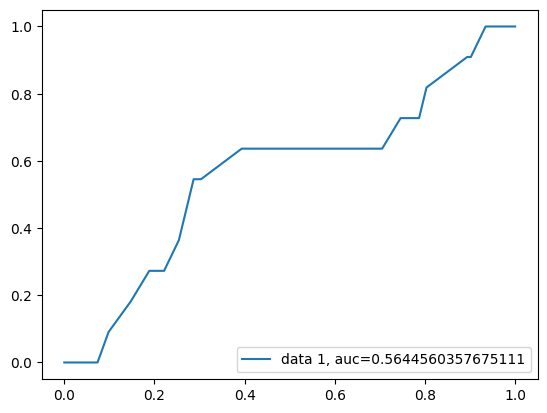

In [9]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [10]:
df['label'].value_counts()

label
0    487
1     45
Name: count, dtype: int64

In [11]:
df_man = df[ df['sexo'] == 'M']
df_man

,fecha_nacimiento,sexo,fecha_examen,examen,edad,fuma,label
1,1982-05-29,M,2024-02-16,ANTIGENO PROSTOTICO ESPECIFICO TOTAL,42,no,0
2,1982-05-29,M,2024-02-16,ELECTROCARDIOGRAMA DE REPOSO,42,si,1
3,1982-06-23,M,2023-12-11,ELECTROCARDIOGRAMA DE REPOSO,42,no,0
4,1982-06-23,M,2023-12-11,RADIOGRAFIA TORAX FRONTAL LATERAL,42,no,0
5,1982-06-23,M,2023-12-11,ORINA COMPLETA,42,no,0
...,...,...,...,...,...,...,...
527,1981-10-25,M,2023-06-02,CUESTIONARIO MEDICO,43,no,0
528,1981-10-25,M,2023-06-02,PERFIL BIOQUIMICO,43,no,0
529,1981-10-25,M,2023-06-02,ORINA COMPLETA,43,no,0
530,1981-10-25,M,2023-06-02,ELECTROCARDIOGRAMA DE REPOSO,43,no,0


In [12]:
df_man["label"].sum()

33

In [13]:
df['label'].value_counts()

label
0    487
1     45
Name: count, dtype: int64

In [14]:
df_women = df[ df['sexo'] == 'F']
df_women

,fecha_nacimiento,sexo,fecha_examen,examen,edad,fuma,label
0,1998-08-20,F,2024-03-13,ANTIGENO PROSTOTICO ESPECIFICO TOTAL,26,no,0
13,1980-03-18,F,2023-12-11,ELECTROCARDIOGRAMA DE REPOSO,44,no,0
14,1980-03-18,F,2023-12-11,RADIOGRAFIA TORAX FRONTAL LATERAL,44,no,0
15,1980-03-18,F,2023-12-11,ORINA COMPLETA,44,no,0
16,1980-03-18,F,2023-12-11,PERFIL BIOQUIMICO,44,si,1
...,...,...,...,...,...,...,...
514,1974-08-20,F,2023-06-02,PERFIL BIOQUIMICO,50,no,0
515,1974-08-20,F,2023-06-02,TOMA DE MUESTRA VENOSA ADULTO,50,no,0
516,1974-08-20,F,2023-06-02,CUESTIONARIO MEDICO,50,no,0
525,1982-11-16,F,2023-06-02,CUESTIONARIO MEDICO,42,no,0


In [15]:
df[ df['sexo'] == 'F']['label'].sum()

12

In [16]:
#Probabilidad
rat_men = 33/370
rat_women = 12/162
print(f'Hombres tienen {rat_men} de expuesto a fumar')
print(f'Mientras que la de las mujeres fue de  {rat_women}')

Hombres tienen 0.0891891891891892 de expuesto a fumar
Mientras que la de las mujeres fue de  0.07407407407407407


In [17]:
pd.crosstab(index=df['sexo'], columns=df['edad'])

edad,26,33,34,35,36,37,38,39,40,41,...,63,64,65,66,67,68,71,72,73,74
sexo,,,,,,,,,,,,,,,,,,,,,
F,1,0,6,6,2,13,8,11,4,8,...,3,0,1,0,1,0,7,0,0,0
M,7,5,1,6,13,13,15,21,17,19,...,19,8,12,10,0,8,0,1,6,5


In [18]:
pd.pivot_table(df,index=['sexo','fuma'], values = 'label', aggfunc = 'sum' )

label
sexo fuma       
F    no        0
     si       12
M    no        0
     si       33

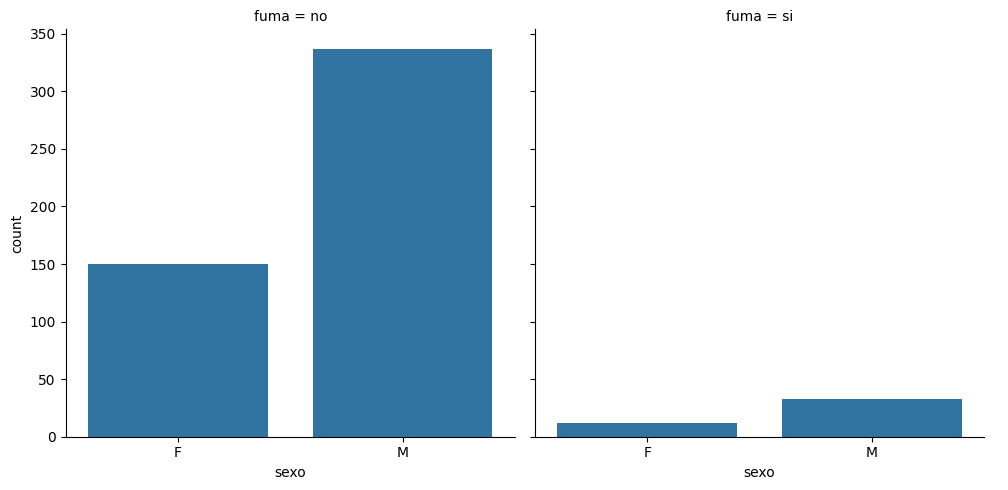

In [19]:
g = sns.catplot(data=df, x="sexo", col="fuma", kind="count")

In [20]:
print("Examenes por Sexo")
pd.crosstab(index=df['examen'], columns=df['sexo'])

Examenes por Sexo


sexo,F,M
examen,,
ANTIGENO PROSTOTICO ESPECIFICO TOTAL,1,5
CUESTIONARIO MEDICO,64,148
ELECTROCARDIOGRAMA DE REPOSO,18,34
"ERGOMETRIA, ECG DE ESFUERZO",3,13
ORINA COMPLETA,22,49
PERFIL BIOQUIMICO,20,47
PERFIL LIPIDICO,3,12
RADIOGRAFIA TORAX FRONTAL LATERAL,19,37
TOMA DE MUESTRA VENOSA ADULTO,12,23
